In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt




In [7]:
df = pd.read_csv('non_index_completed.csv',index_col = 'biomarkers')


In [8]:
print(df.index)

Index(['cg00000292', 'cg00002426', 'cg00003994', 'cg00005847', 'cg00006414',
       'cg00007981', 'cg00008493', 'cg00008713', 'cg00009407', 'cg00010193',
       ...
       'cg27653134', 'cg27654142', 'cg27655855', 'cg27655905', 'cg27657249',
       'cg27657283', 'cg27661264', 'cg27662379', 'cg27662877', 'cg27665659'],
      dtype='object', name='biomarkers', length=27578)


In [9]:
scaled_data = preprocessing.scale(df.T)
print(scaled_data)

[[ 1.41949909  0.11600703  0.26954153 ... -0.50848918 -0.37494081
   1.00471499]
 [-1.73068944  1.14207876  2.24950203 ... -0.15273862 -0.37494081
  -1.78631832]
 [ 0.17898493 -1.22041702 -0.85700771 ...  2.08553536 -0.37494081
  -1.17861203]
 ...
 [ 0.67525561  0.19731078 -0.66322391 ... -0.50848918 -0.37494081
   0.28339221]
 [-0.76009625 -0.42743103  0.04184225 ... -0.50848918 -0.37494081
   0.74444112]
 [-1.24035796 -1.15788431 -0.29141264 ... -0.50848918 -0.37494081
   0.33215903]]


In [10]:
!pip install sklearn
!pip  install matplotlib

In [11]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [12]:
imp_mean.fit(scaled_data)


SimpleImputer()

In [13]:
scaled_data = imp_mean.transform(scaled_data)
print(scaled_data)

[[ 1.41949909  0.11600703  0.26954153 ... -0.50848918 -0.37494081
   1.00471499]
 [-1.73068944  1.14207876  2.24950203 ... -0.15273862 -0.37494081
  -1.78631832]
 [ 0.17898493 -1.22041702 -0.85700771 ...  2.08553536 -0.37494081
  -1.17861203]
 ...
 [ 0.67525561  0.19731078 -0.66322391 ... -0.50848918 -0.37494081
   0.28339221]
 [-0.76009625 -0.42743103  0.04184225 ... -0.50848918 -0.37494081
   0.74444112]
 [-1.24035796 -1.15788431 -0.29141264 ... -0.50848918 -0.37494081
   0.33215903]]


In [14]:
pca = PCA()

In [15]:
pca.fit(scaled_data)

PCA()

In [16]:
pca_data = pca.transform(scaled_data)

In [17]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 

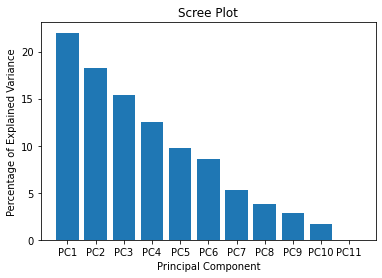

In [18]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [19]:
pca_df = pd.DataFrame(pca_data, index=df.columns, columns=labels)


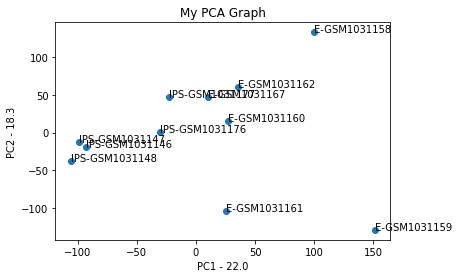

In [20]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel(f'PC1 - {per_var[0]}')
plt.ylabel(f'PC2 - {per_var[1]}')
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

In [21]:
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores

In [22]:

loading_scores = pd.Series(pca.components_[0], index=df.index)

In [23]:
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 

In [24]:
top_20_biomarkers = sorted_loading_scores[0:20].index.values

In [25]:
loading_scores[top_20_biomarkers]


biomarkers
cg20663831   -0.012606
cg15052335   -0.012599
cg21022395   -0.012488
cg02845923   -0.012478
cg21833459   -0.012433
cg26866325   -0.012431
cg05161795   -0.012401
cg00134787   -0.012393
cg23839680   -0.012378
cg09358725   -0.012351
cg19863405   -0.012346
cg21787280   -0.012325
cg22940988   -0.012302
cg17824393   -0.012297
cg14003467   -0.012295
cg08659539   -0.012260
cg01796228   -0.012260
cg01958189   -0.012257
cg24056567   -0.012249
cg18997662    0.012226
dtype: float64